                                    Final Project 

---------------------

   Project overview:
   
   Economists Arturo Estrella and Tobias Adrian pointed out that at the end of the Federal Reserve’s monetary policy tightening cycle will be followed by increases in the unemployment rate when the spread between the 3-month and the 10-year constant maturity Treasury rate is negative or less than 93 positive basis points.
   
   Normally, a low unemployment rate tends to be a reliable predictor of an economic recession, because the unemployment rate tends to reach a trough shortly before an economic recession, and once the recession begins, unemployment rises sharply. 
   
   The inversion of the yield curve has always been regarded as a reliable predictor of economic recession. Under normal circumstances, an upward slope yield curve indicates economic growth.  Because the short-term treasury is more liquid than the long-term treasury, the interest rate of the long-term treasury is higher than the short-term treasury.  However, when the interest rate of the long-term treasury is lower than the short-term treasury, the yield curve is inverted. Investors are more willing to hold long-term treasury bonds with low-interest rates to lock in funds, indicating that investors have weak confidence in the future long-term economic growth. Therefore, the Fed needs to lower interest rates to make the economy enter a period of prosperity, curb the rise in the unemployment rate, and reduce the unemployment rate.

   The purpose of this project will study the relationship between the unemployment rate and the yield curve in the United States. We assume that the decline in the yield curve heralds economic recession, and followed by an increase in the unemployment rate.  We will examine the spread between 10-Year Treasury Constant Maturity and 2-Year Treasury Constant Maturity, to test if we could get the same result to support Arturo Estrella and Tobias Adrian's hypotheses.
  
  
   --------------- 
   
   Project Structure:

Our project will consist of 3 sections. In the first section, we will define our key variables and cite our sources. We will also briefly review the portions of the standard economic model which are relevant to our experiment and hypothesize based on the implications of the standard model.

Next, we will preliminarily analyze our data using basic graphic and statistical techniques on Python. In particular, we will plot time-series graphs for the national unemployment rate and the yield curve, two basic variables from FRED, to visualize any possible correlations between the two variables.

Finally, we will merge our two datasets for the unemployment rate and the yield curve so we can then run a regression analysis to test our hypothesis of a correlative relationship between the two aforementioned variables. We will also briefly acknowledge the consequences of our analysis’s results for the standard macroeconomic model as well as muse about the direction in which research should continue for this topic.

   Data Report:

We downloaded the data for our project from the Federal Reserve Economic Data website (FRED), which provides monthly statistics for measures of economic activity. This website contains several time-series CSV’s recording the values of many macroeconomic variables, including but certainly not limited to the unemployment rate and the yield curve.

   Key Variables:

We are particularly interested in a time-series record of the unemployment rate in the US. We can define the unemployment rate, as per any macroeconomics textbook, as the ratio of the number of individuals with jobs to the number of individuals with jobs plus the number of jobless individuals searching for employment. By definition of this fraction, the unemployment rate will always be a rational number greater than zero and and less than one. For the purposes of this experiment, the unemployment rate will serve as a proxy for economic recession, which agrees with the assumptions of the standard macroeconomic model; in times characterized by a high unemployment rate, firms employ fewer workers which limits the amount of consumption spending in an economy, consequently lowering the economy’s output and resulting in an economic recession.

Next, according to the US Department of the Treasury Resource Center, the yield curve “relates the yield on a security to its time to maturity...based on the closing market bid yields on actively traded Treasury securities in the over-the-counter market.” As we mentioned above, the yield curve represents investors’ confidence in the state of the economy. By definition, the y-axis represents the percentage yield of 10-year treasury bonds minus that of 2-year treasury bonds. Given that the former bonds have a longer time to mature, we would expect that the percentage yields of the 10-year bonds would be greater than that of the 2-year bonds, so the difference defined in the yield curve should be positive. However, an inversion of the yield curve occurs when the difference between the percentage yields is negative; in these instances, the collective crisis of confidence in the economy leads investors to hold onto longer-term bonds with lower interest rates to secure their funds rather than to take risks during an ominous economic outlook.

Our hypothesis is that there exists a statistically significant positive relationship between the yield curve and the unemployment rate. In particular, we expect that as the yield curve increases, so does the unemployment rate; by definition, the yield curve is a function of the interest rate, so an increase in the yield curve implies an increase in the interest rate and consequently the standard macroeconomic prediction of an increase in the unemployment rate, resulting in recession.

   
   -----------------------


In [2]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [3]:
#Access Data : Unemployment Rate
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [4]:
data.columns=['DATE','URATE']
data.head()

,DATE,URATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [5]:
#Summary Statistics for Unemployment Rate
data.describe()

,URATE
count,875.000000
mean,5.765371
std,1.707381
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.700000


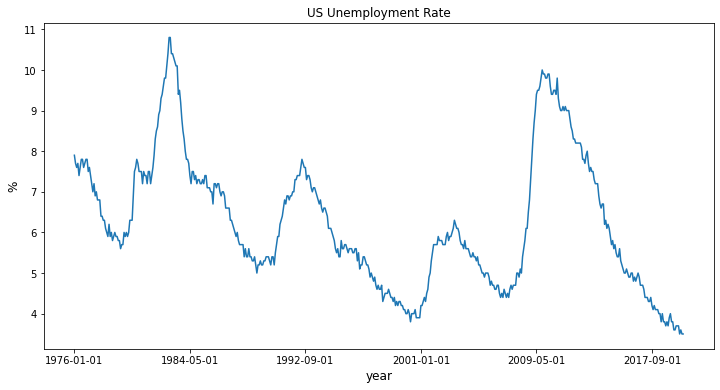

In [6]:
#Graphing the Unemployment Rate
data1=data.set_index('DATE')
ax = data1['1976':'2020'].plot(title='US Unemployment Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [7]:
#Access Data: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
url_y = 'http://research.stlouisfed.org/fred2/series/T10Y2YM/downloaddata/T10Y2YM.csv'
data_y = pd.read_csv(url_y, parse_dates=True)
data_y.head()

,DATE,VALUE
0,1976-06-01,0.80
1,1976-07-01,0.98
2,1976-08-01,1.14
3,1976-09-01,1.17
4,1976-10-01,1.43


In [8]:
data_y.columns=['DATE', 'Yield Curve']
data_y.head()

,DATE,Yield Curve
0,1976-06-01,0.80
1,1976-07-01,0.98
2,1976-08-01,1.14
3,1976-09-01,1.17
4,1976-10-01,1.43


In [9]:
#Summary Statistics for Yield Curve
data_y.describe()

,Yield Curve
count,534.000000
mean,0.926498
std,0.908005
min,-2.130000
25%,0.250000
50%,0.850000
75%,1.567500
max,2.830000


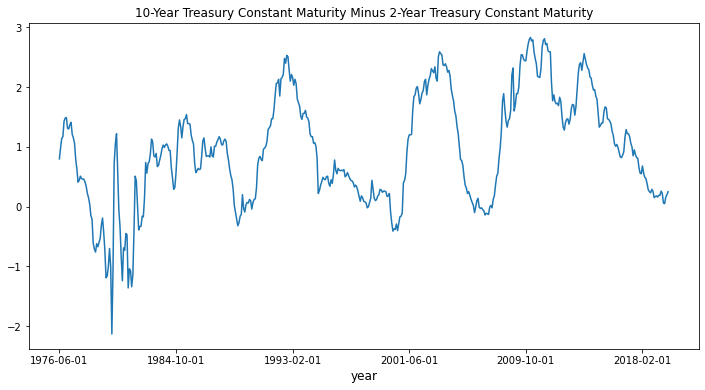

In [10]:
#Graphing Yield Curve
data_y1=data_y.set_index('DATE')
ax = data_y1['1976':'2020'].plot(title='10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [11]:
data_merge=pd.merge(data, data_y, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge['const']=1

In [12]:
data_merge.head()

,DATE,URATE,Yield Curve,const
0,1976-06-01,7.6,0.80,1
1,1976-07-01,7.8,0.98,1
2,1976-08-01,7.8,1.14,1
3,1976-09-01,7.6,1.17,1
4,1976-10-01,7.7,1.43,1


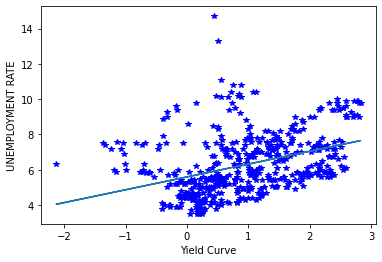

In [13]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge['Yield Curve'],data_merge['URATE'],'b*')
ax.set_xlabel("Yield Curve")
ax.set_ylabel("UNEMPLOYMENT RATE")
b,m=polyfit(data_merge['Yield Curve'],data_merge['URATE'],1)
ax.plot(data_merge['Yield Curve'],b+m*data_merge['Yield Curve'],'-')

In [14]:
m

0.7276003417463172

Regression Analysis:

We want to establish a relationship between the unemployment rate and yield curve, so we run a linear regression.

In [16]:
reg1 = sm.OLS(endog=data_merge['URATE'],exog=data_merge[['const','Yield Curve']]).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  URATE   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     92.14
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           3.14e-20
Time:                        00:49:36   Log-Likelihood:                -1004.0
No. Observations:                 534   AIC:                             2012.
Df Residuals:                     532   BIC:                             2021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5952      0.098     56.926      

   Conclusion:

Given the p-value of < 0.001 and the positive coefficient for the yield curve, we have sufficient statistical evidence to reject the null hypothesis that the yield curve has no effect on the unemployment rate, and consequently whether or not the economy goes into a recession. In fact, we have sufficient statistical evidence of a positive correlation between the yield curve and the unemployment rate.

This finding is in line with the dogma of standard macroeconomic theory. If we understand the yield curve as a function of interest rates, then we must accept that if the yield curve increases, then interest rates must have increased as well. This change in interest rates influences investors to make different decisions regarding their investments, and their decisions are reflected to some extent in the health and the output of the economy. In particular, we recite the tenet of standard macroeconomic theory that an increase in interest rates essentially increases the cost of investing relative to the investment's future yields; consequently, since output is composed of the sum of net exports, consumption, government spending, and investment, an increase in interest rates decreases total investments and as a result depresses the total output, which is the textbook definition of an economic recession. Of course, by a similar argument a decrease in interest rates results in increased investments, boosting economic growth.

However, we must acknowledge our rather low r^2 statistic, which unfortunately means that the yield curve accounts for only a small fraction in the change of the unemployment rate. In order to make this model more accurate, we must add other variables such as the number of small businesses going defunct each month or perhaps the political party of the contemporary presidential administration.

We can argue that this experiment supports the conclusions of Arturo Estrella and Tobias Adrian's study. Going forward with further research in this topic, it would be intriguing to calculate the slope of the yield curve for each month since 1976 and then to test for a correlation between the slope of the yield curve and the unemployment rate as a proxy for recession. Furthermore, given that the slope of the yield curve is supposed to predict recessions, it might be a worthwhile project to determine how far in advance a decrease in the yield curve precedes a recession. If the slope of the yield curve is in fact a reliable predictor of the health of an economy, then certainly it is a worthwhile exercise to attempt to extrapolate as much information as we can from the yield curve so that we may, as a society, prepare adequately for the next economic recession.